# Eigenfaces

In [53]:
import numpy as np
from matplotlib import pyplot as plt
import networkx as nx
import pandas as pd
from sklearn.cluster import KMeans
from scipy.linalg import fractional_matrix_power
from scipy import sparse
from skimage import io
from skimage.transform import resize, rescale, downscale_local_mean
import sys
import os, glob
from math import ceil



In [54]:
# for filename in os.listdir("data/yalefaces/"):
#     print(filename)
files1 = []
files2 = []


subject2 = []
    
for filename in glob.glob("data/yalefaces/*01.*.gif"):
    files1.append(filename)
#     subject1.append(io.imread(filename))

for filename in glob.glob("data/yalefaces/*02.*.gif"):
    files2.append(filename)
    
# print(files1)



##### Orginal images

Subject 1:

<Figure size 57600x57600 with 0 Axes>

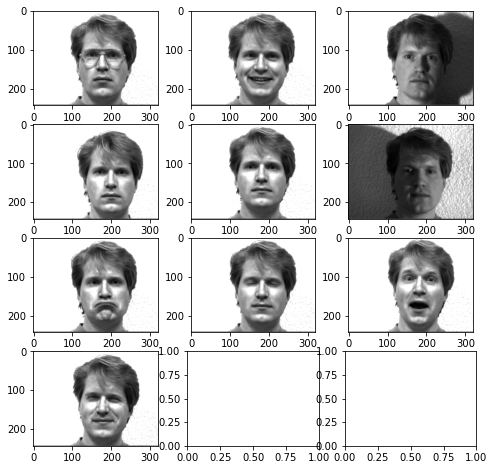

In [55]:
subject1 = []

plt.figure(figsize = (800,800))
fig, axes = plt.subplots(nrows = ceil((len(files1)+1) / 3), ncols=3, figsize = (8,8))
ax = axes.ravel()

for i, file in enumerate(files1):
    subject1.append(io.imread(file))
    ax[i].imshow(subject1[i], cmap='gray')
    


Subject 2:

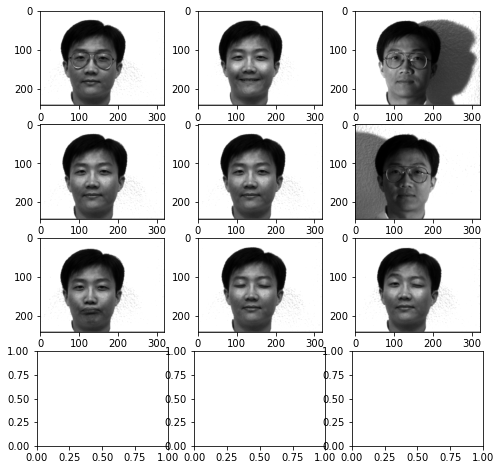

In [56]:
subject2 = []

# plt.figure(figsize = (800,800))
fig, axes = plt.subplots(nrows = ceil((len(files2)+1) / 3), ncols=3, figsize= (8,8))
ax = axes.ravel()

for i, file in enumerate(files2):
    subject2.append(io.imread(file))
    ax[i].imshow(subject2[i], cmap='gray')

In [57]:
# len(ax)

##### Downscaled Images

Subject 1:

<Figure size 57600x57600 with 0 Axes>

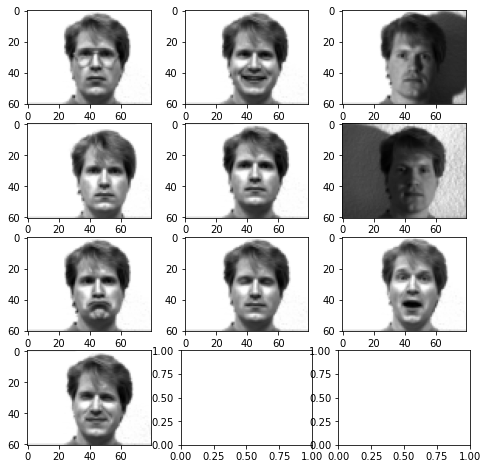

In [58]:
subject1down = []

plt.figure(figsize = (800,800))
fig, axes = plt.subplots(nrows = ceil((len(subject1)+1) / 3), ncols=3, figsize = (8,8))
ax = axes.ravel()

for i, pic in enumerate(subject1):
#     subject1down.append(resize(pic, (pic.shape[0] // 4, pic.shape[1] // 4),
#                        anti_aliasing=True))
#     subject1down.append(downscale_local_mean(subject1[i], (4,4)))
    subject1down.append(rescale(pic, .25, multichannel = False))
    ax[i].imshow(subject1down[i], cmap='gray')

Subject 2:

<Figure size 57600x57600 with 0 Axes>

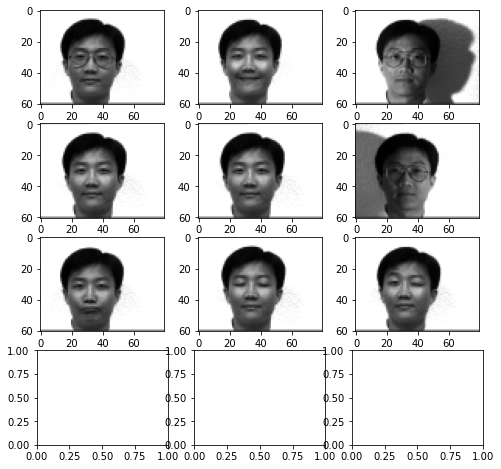

In [59]:
subject2down = []

plt.figure(figsize = (800,800))
fig, axes = plt.subplots(nrows = ceil((len(subject2)+1) / 3), ncols=3, figsize = (8,8))
ax = axes.ravel()

for i, pic in enumerate(subject2):
    subject2down.append(downscale_local_mean(subject2[i], (4,4)))
    ax[i].imshow(subject2down[i], cmap='gray')

In [60]:
s1shapes = []
s1vec = []
for pic in subject1down:
    s1shapes.append(np.shape(pic))
    s1vec.append(np.matrix.flatten(pic))

# s1mean = np.mean(s1vec, axis = 0)
s1vec = np.stack(s1vec)
# s1vec -= s1mean


s2vec = []
s2shapes = []
for pic in subject2down:
    s2shapes.append(np.shape(pic))
    s2vec.append(np.matrix.flatten(pic))
    
# s2mean = np.mean(s2vec, axis = 0)
s2vec = np.stack(s2vec)
# s2vec -= s2mean

# s1vec.shape


In [61]:
# def pca(data):
    
#     avg = np.mean(data, axis = 0)
    
#     data -= avg
    
#     cov = np.cov(data)
#     vals, vecs = np.linalg.eigh(cov)

#     valsort = vals[np.argsort(-vals)]
#     vecsort = vecs[:,np.argsort(-vals)]


#     proj = np.dot(data.T, vecsort)

#     # To be returned
#     return vecsort, proj

In [62]:
s1vec = s1vec.T
s2vec = s2vec.T

# s1mean = np.mean(s1vec, axis = 0)
# s1vec = s1vec - s1mean
# s2mean = np.mean(s2vec, axis = 0)
# s2vec = s2vec - s2mean

# s1eig, s1proj = pca(s1vec)
# s2eig, s1proj = pca(s2vec)
s1svd = np.linalg.svd(s1vec)
s2svd = np.linalg.svd(s2vec)


In [63]:
# s1svd[0].shape
# s1svd[0][2]
# len(s1vec[0])
# print(len(s1mean[0]))
# print(s1vec.shape)
# print(s1svd[0])

**1. Perform analysis on the Yale face dataset for Subject 1 and Subject 2, respectively, using
all the images EXCEPT for the two pictures named subject01-test.gif and subject02-test.gif. Plot the
first 6 eigenfaces for each subject. When visualizing, please reshape the eigenvectors into proper
images. Please explain can you see any patterns in the top 6 eigenfaces?**

##### Eigenfaces

Subject 1:

<Figure size 57600x57600 with 0 Axes>

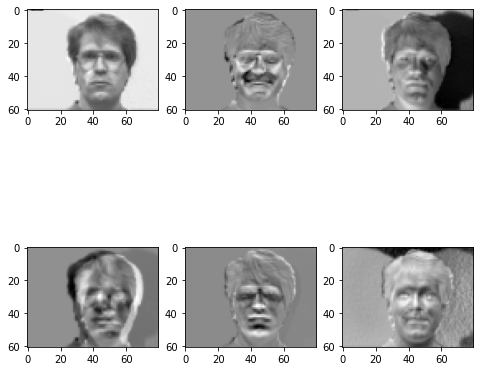

In [36]:
s1eigfaces = []

plt.figure(figsize = (800,800))
fig, axes = plt.subplots(nrows = 2, ncols=3, figsize = (8,8))
ax = axes.ravel()

for i, pic in enumerate(s1svd[0][0:6]):
    res = pic
#     print(pic)
#     print(s1mean)
    s1eigfaces.append(np.reshape(res, s1shapes[i]))
    ax[i].imshow(s1eigfaces[i], cmap='binary')

Subject 2:

<Figure size 57600x57600 with 0 Axes>

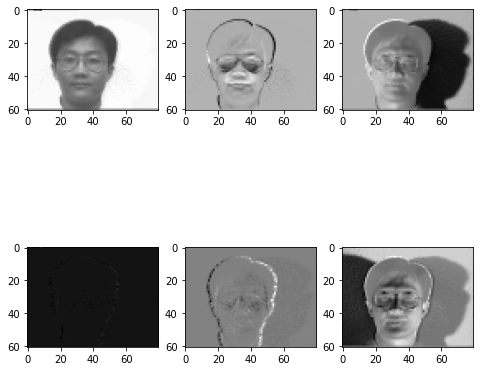

In [33]:
s2eigfaces = []

plt.figure(figsize = (800,800))
fig, axes = plt.subplots(nrows = 2, ncols=3, figsize = (8,8))
ax = axes.ravel()

for i, pic in enumerate(s2svd[0][0:6]):
    s2eigfaces.append(np.reshape(pic, s2shapes[i]))
    ax[i].imshow(-s2eigfaces[i], cmap='gray')

As expected, the first eigenface for each person is a blurred but recognizable picture of their face. The next few eigenfaces show a lot of the shadow and contouring details. The black square which is the 4th eigenface for subject 4 is interesting: Comparing the first eigenface of subject 1 to subject 2, subject 1's background is darker. Essentially, the algorithm decided that one of the top principle components of the Subject 2 images was darkness--isolating this principle component allows more detail to be shown in the other principle components.

In our 6 examples, it looks like for both subjects, the 2nd and 4th eigenface show contouring, the 3rd and 6th show shadows, and the 3rd concerns brightness.

##### Test Images

<Figure size 57600x57600 with 0 Axes>

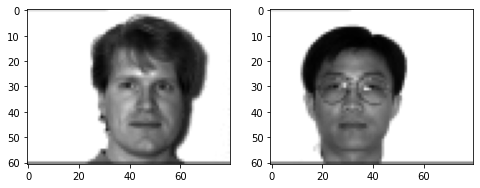

In [34]:
testfiles = ['data/yalefaces/subject01-test.gif', 'data/yalefaces/subject02-test.gif']

testpics = []
testvecs = []

plt.figure(figsize = (800,800))
fig, axes = plt.subplots(nrows = 1, ncols=2, figsize = (8,8))
ax = axes.ravel()

for i, file in enumerate(testfiles):
    full = io.imread(file)
    testpics.append(downscale_local_mean(full, (4,4)))
    ax[i].imshow(testpics[i], cmap='gray')
    

for pic in testpics:
#     s1shapes.append(np.shape(pic))
    testvecs.append(np.matrix.flatten(pic))



**2. Now we will perform a simple face recognition task.
Face recognition through PCA is proceeded as follows. Given the test image subject01-test.gif and
subject02-test.gif, first downsize by a factor of 4 (as before), and vectorize each image. Take the top
eigenfaces of Subject 1 and Subject 2, respectively. Then we calculate the normalized inner product
score of the 2 vectorized test images with the vectorized eigenfaces:**

**sij =**

**( (eigenface)Ti * (test image)jk )  / ( (eigenfacei)k · k(test image)jk )**




Below, we show the normalized iner product score, or cosine similarity, of each subject with each test image.

In [64]:
s1top = s1svd[0][0]
s2top = s2svd[0][0]

def norminnprod(eig, test):
    top = np.dot(eig.T, test)
    bott = np.dot(np.linalg.norm(eig), np.linalg.norm(test))
    return round(top / bott, 5)

#score for subj 1, test 1:
print(f"Score for subject 1, test image 1: {norminnprod(-s1top, testvecs[0])}")
print(f"Score for subject 1, test image 2: {norminnprod(-s1top, testvecs[1])}")
print(f"Score for subject 2, test image 1: {norminnprod(-s2top, testvecs[0])}")
print(f"Score for subject 2, test image 2: {norminnprod(-s2top, testvecs[1])}")

Score for subject 1, test image 1: 0.9731
Score for subject 1, test image 2: 0.89715
Score for subject 2, test image 1: 0.85955
Score for subject 2, test image 2: 0.99109


We can "recognize" the faces via these scores. a score of 1 is a perfect match for the face. A score of -1 is a perfect opposite. In this case, we see that the test image of Subject 1 matches very closely to the subject 1 eigenface. Likewise, the subject 2 test image is a very close match to the subject 2 eigenface. For each test image, the similarity is much lower for the wrong face.

Face recognition can definitely work well and is already a part of the public conscious with Facebook's facial recognition in photos. The difficulty with this data is that faces need to be centered and facing forward. A more robust algorithm would involve identifying rotations in the face (maybe through identifying eyes-nose-mouth and classifying their orientation), then would be able to center the face. Lighting would also represent a problem--in our case, lighting conditions were fairly similar, except for the shadows--but "natural" pictures will have a wide variety of lighting conditions and exposures. We could probaly adjust lighting by doing something like centering the color values on 0.